# other plot

1. [bar plots](http://pandas.pydata.org/pandas-docs/stable/visualization.html#bar-plots)

1. [histograms](http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)

1. [box plots](http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots)

1. [area plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#area-plot)

1. [scatter plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)

1. [hexagonal bin plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#hexagonal-bin-plot)

1. [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#pie-plot)

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
%matplotlib inline

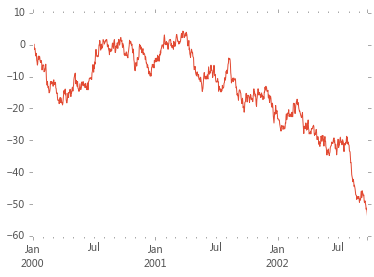

In [2]:
data = np.random.randn(1000)
days = pd.date_range('2000-01-01', periods=1000)
ts = pd.Series(data, index=days)
ts = ts.cumsum()
# the plot method on Series and DataFrame
# is just a simple wrapper around plt.plot()
ts.plot()

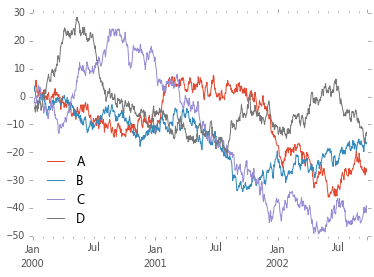

In [3]:
data = np.random.randn(1000, 4)
df = pd.DataFrame(data, index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot();

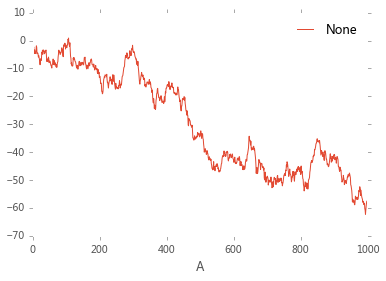

In [4]:
# you can plot one column versus another
# using the x and y keywords in plot()
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C'])
df3 = df3.cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

# other plots
1. the `kind` keyword argument of `plot()` accepts values for plot

    * `bar` or `barh` for bar plots
    * `hist` for histograme
    * `box` for boxplot
    * `kde` or `density` for density plots
    * `area` for area plots
    * `scatter` for scatter plots
    * `hexbin` for hexagonal bin plots
    * `pie` for pie plots
    
1. there are the `DataFrame.hist()` and `DataFrame.boxplot()`

1. several [plotting functions](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-tools) in `pandas.tools.plotting`
    
    1. [scatter matrix](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-scatter-matrix)
    1. [andrews curves](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-andrews-curves)
    1. [parallel coordinates](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-parallel-coordinates)
    1. [lag plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-lag)
    1. [autocorrelation plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-autocorrelation)
    1. [bootstrap plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-bootstrap)
    1. [radviz](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-radviz)

# bar plots

`kind='bar'`

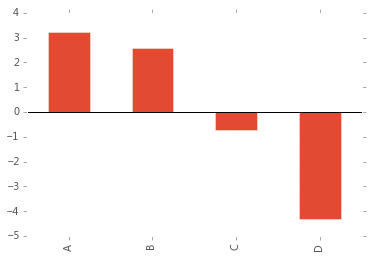

In [5]:
plt.figure()
# calling a df's plot() method
# with `kind='bar'` produces a multiple bar plot
df.ix[5].plot(kind='bar')
plt.axhline(0, color='k')

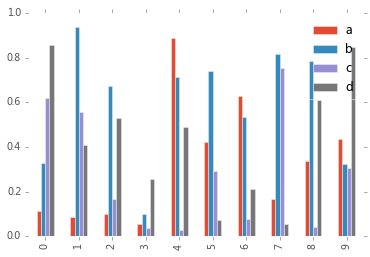

In [6]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot(kind='bar');

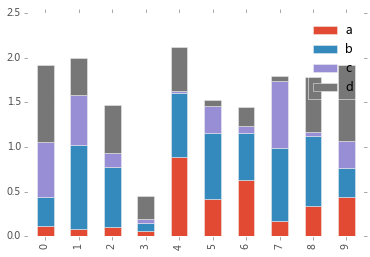

In [7]:
# to produce a stacked bar plot
# pass `stacked=True`
df2.plot(kind='bar', stacked=True)

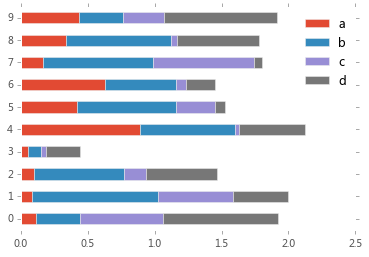

In [8]:
# to get horizontal bar plots
# pass `kind='barh'`
df2.plot(kind='barh', stacked=True)

# histograms

new in version 0.15.0

histogram can be drawn specifying

`kind='hist'`

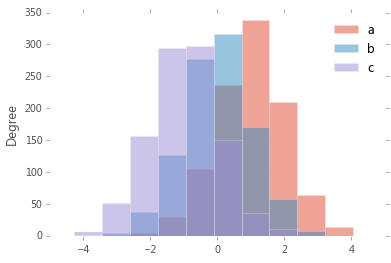

In [9]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();
df4.plot(kind='hist', alpha=0.5)

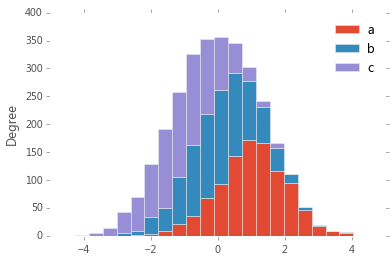

In [10]:
# histogram can be stacked by `stacked=True`
# bin size can be changed by `bins` keyword
plt.figure();
df4.plot(kind='hist', stacked=True, bins=20)

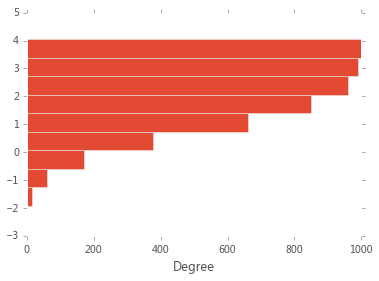

In [11]:
# horizontal by orientation='horizontal'
# cumulative by cumulative=True
plt.figure();
df4['a'].plot(kind='hist', orientation='horizontal', cumulative=True)

see the `hist` method and the [matplotlib hist documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)
the existing interface `DataFrame.hist` can be used

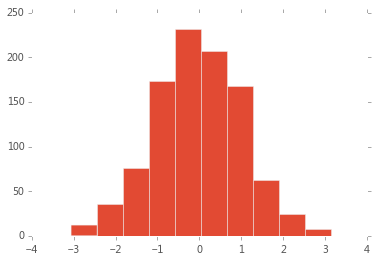

In [12]:
plt.figure();
df['A'].diff().hist()

`DataFrame.hist()` plots the histograms of the columns on multiple subplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ac82990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bc2d110>]], dtype=object)

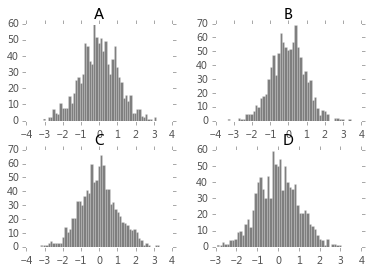

In [13]:
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50)

the `by` keyword can be specified to plot grouped histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c3d7f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b1bf590>]], dtype=object)

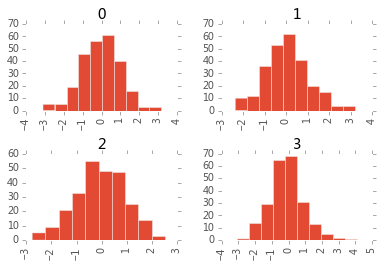

In [14]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

# box plots

1. boxplot can be drawn calling a `Series` and `DataFrame.plot` with `kind='box'`

1. or `DataFrame.boxplot`

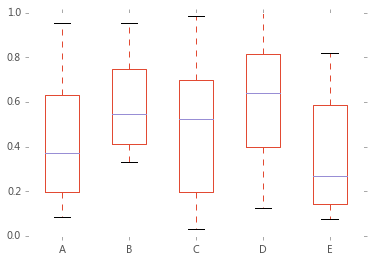

In [15]:
# five trials of 10 observations of
# a uniform random variable on [0, 1)
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot(kind='box')

boxplot can be colorized by passing `color` keyword
you can pass a `dict`
    
* boxes
* whiskers
* medians
* caps

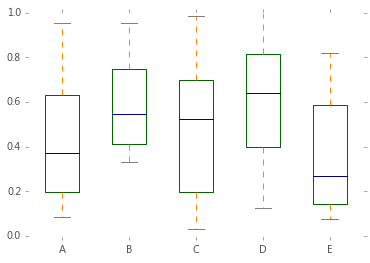

In [16]:
color = dict(boxes='DarkGreen',
             whiskers='DarkOrange',
             medians='DarkBlue',
             caps='Gray')
df.plot(kind='box', color=color, sym='r+')

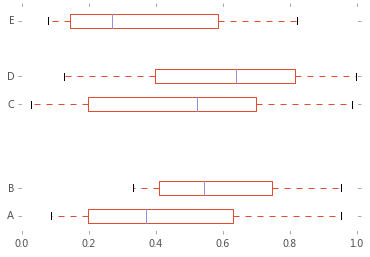

In [17]:
# vert=False and positions
df.plot(kind='box', vert=False, positions=[1, 2, 5, 6, 8])

see the `boxplot` method and the [matplotlib boxplot documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot)

the existing interface `DataFrame.boxplot` can be used

/Users/hqlgree2/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


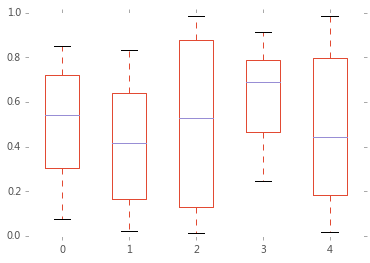

In [18]:
df = pd.DataFrame(np.random.rand(10, 5))
plt.figure();
bp = df.boxplot()

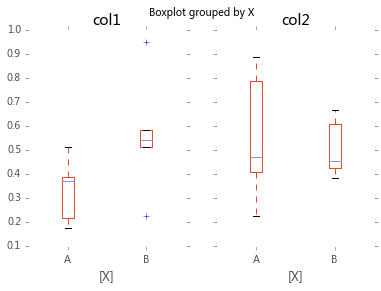

In [19]:
# using `by` keyword
df = pd.DataFrame(np.random.rand(10, 2), columns=['col1', 'col2'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])
plt.figure()
bp = df.boxplot(by='X')

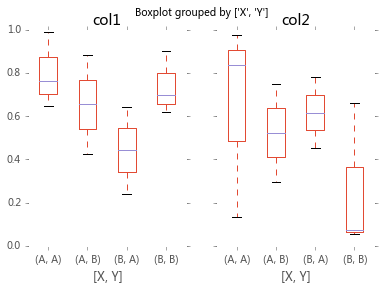

In [20]:
# pass a subset of colomns to plot
# as well as group by multiple columns
df = pd.DataFrame(np.random.rand(10, 3), columns=['col1', 'col2', 'col3'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])
df['Y'] = pd.Series(['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'])
plt.figure();
bp = df.boxplot(column=['col1', 'col2'], by=['X', 'Y'])

plot functions return `matplotlib Axes` as a return value

in `boxplot` the return value type can be changed by argument `return_type`

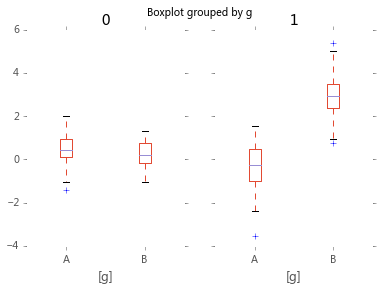

In [21]:
# when calling boxplot on a `groupby` object
# a dict of `return_type` is returned
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')

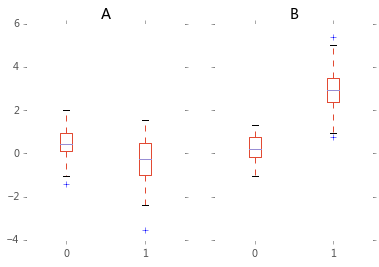

In [22]:
bp = df_box.groupby('g').boxplot()

# area plot

create area plot with `Series.plot` and `DataFrame.plot`

by passing `kind='area'`

if input data contains NaN, it will be automatically filled by `0`

use `dataframe.dropna()` or `dataframe.fillna()` before calling plot

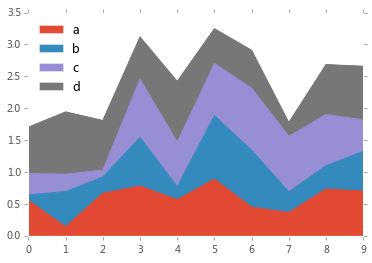

In [23]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='area')

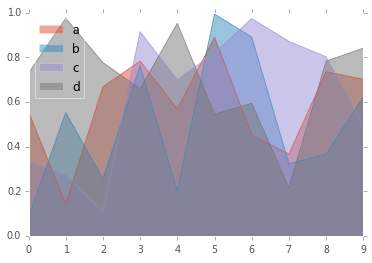

In [24]:
# pass `stacked=False`
# `alpha` value is set to 0.5
df.plot(kind='area', stacked=False)

# scatter plot

passing `kind='scatter'` to `DataFrame.plot`

scatter plot requires numeric columns for x and y axis

these can be specified by `x` and `y` keyword each

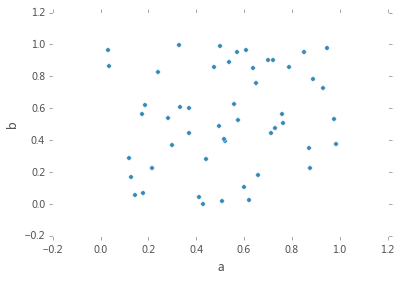

In [25]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='scatter', x='a', y='b')

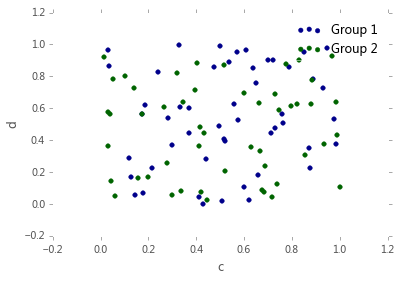

In [26]:
# to plot multiple column groups in a single axes
# repeat `plot` method specifying target `ax`
# recommended to specify `color` and `label` keywords
# to distinguish each groups
ax = df.plot(kind='scatter', x='a', y='b',
             color='DarkBlue', label='Group 1');
df.plot(kind='scatter', x='c', y='d',
        color='DarkGreen', label='Group 2', ax=ax);

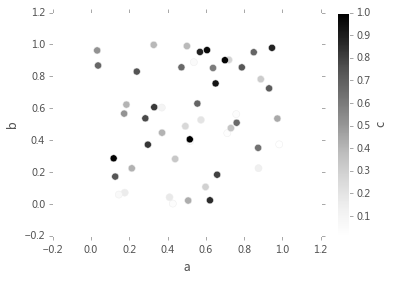

In [27]:
# keyword `c` may be given as the name of a column
# to provide colors for each point
df.plot(kind='scatter', x='a', y='b', c='c', s=50)

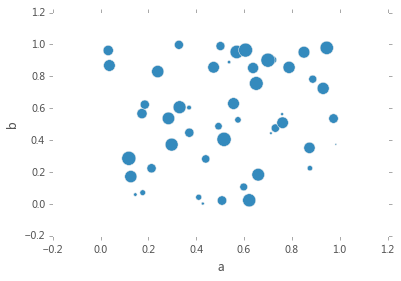

In [28]:
# show bubble chart using a df's column as bubble size
df.plot(kind='scatter', x='a', y='b', s=df.c*200)

see the `scatter` method and the [matplotlib scatter documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

#hexagonal bin plot

create hexagonal bin plot with `DataFrame.plot()`

and `kind='hexbin'`

hexbin plot can be a useful alternative to scatter plot

if your data are too dense to plot each point individually

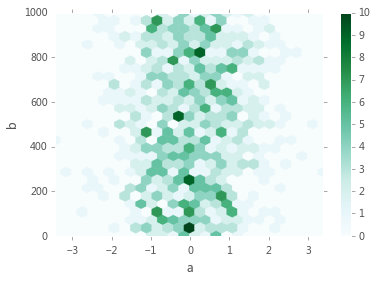

In [29]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.b = df.b + np.arange(1000)
# `gridsize` controls the number of hexagons in the `x-direction`
# default value is `100`
# a larger `gridsize` means more, smaller bins
df.plot(kind='hexbin', x='a', y='b', gridsize=25)

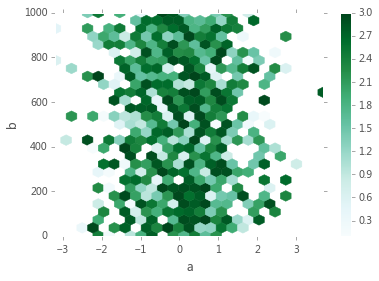

In [30]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.b = df.b + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot(kind='hexbin', x='a', y='b', 
        C='z', reduce_C_function=np.max, gridsize=25)

# pie plot

create pic plot with `DataFrame.plot()` or `Series.plot()`

kind='pie'

`NaN` will be automatically filled with `0`

`ValueError` will be raised if there are any negative values

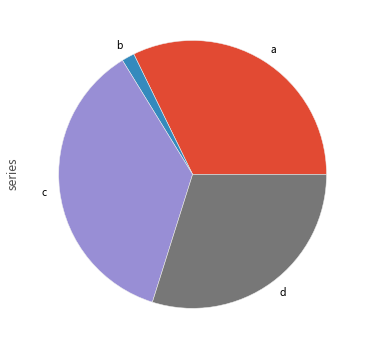

In [31]:
series = pd.Series(3 * np.random.rand(4),
                   index=['a', 'b', 'c', 'd'],
                   name='series')
series.plot(kind='pie', figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10da24ad0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10d47d890>], dtype=object)

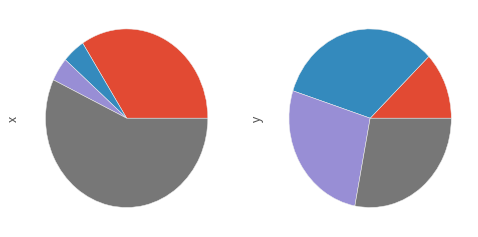

In [32]:
df = pd.DataFrame(3 * np.random.rand(4, 2),
                  index=['a', 'b', 'c', 'd'],
                  columns=['x', 'y'])
# `legend=False` to hide legend
# `labels=None` to hide labels
df.plot(kind='pie', subplots=True, figsize=(8,4),
        legend=False, labels=None)

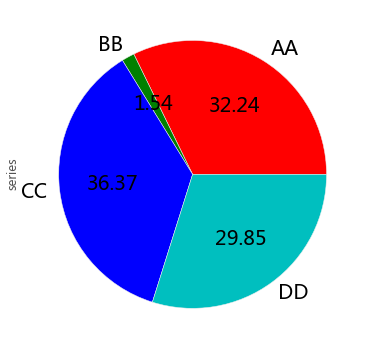

In [33]:
series.plot(kind='pie',
            labels=['AA', 'BB', 'CC', 'DD'],
            colors=['r', 'g', 'b', 'c'],
            autopct='%.2f', fontsize=20, figsize=(6, 6))

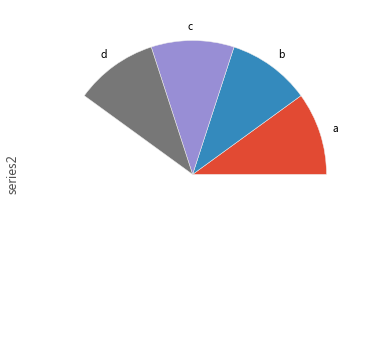

In [34]:
# pass values whose sum total is less than 1.0
# matplotlib draws a semicircle
series = pd.Series([0.1] * 4, name='series2',
                   index=['a', 'b', 'c', 'd'])
series.plot(kind='pie', figsize=(6, 6))

see the [matplotlib pie documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)

# plotting with missing data

line => leave gaps at NaNs

line (stacked) => fill 0's

bar => fill 0's

scatter => drop NaNs

histogram => drop NaNs (column-wise)

box => drop NaNs (column-wise)

area => fill 0's

kde => drop NaNs (column-wise)

hexbin => drop NaNs

pie => fill 0's